In [1]:
%matplotlib inline
import numpy as np
from numpy.random import seed
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns

## I. DATA PART

#### Remark:  Dataset was pre-processed and standardized before (pls see the data_sheet.md)

In [2]:
df = pd.read_excel("dataset.xlsx",sheet_name='bd_dev')
df.head(3)

,cui,Name,D1y TO,D1y BS,D1y Tdebt,GMtoTO,ROA,DRN dys,FA%,CRLiq%,TDtoEBITDA,DEF
0,500,company_500,-1.719252,-0.771973,-0.291153,0.560378,-1.132620,1.570450,1.040733,0.135702,-0.852528,0
1,501,company_501,0.428536,-0.375809,-0.282021,1.311461,0.417333,1.414622,-0.047798,-0.067227,-0.805825,0
2,502,company_502,0.154351,-0.419827,-0.285299,-0.148978,-0.178802,0.928352,-0.358164,-0.421807,-0.151977,0


### I.1 Dataset overview

In [3]:
# First, list the columns
pd.set_option('max_colwidth', None)
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1557 entries, 0 to 1556
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   cui         1557 non-null   int64  
 1   Name        1557 non-null   object 
 2   D1y TO      1557 non-null   float64
 3   D1y BS      1557 non-null   float64
 4   D1y Tdebt   1557 non-null   float64
 5   GMtoTO      1557 non-null   float64
 6   ROA         1557 non-null   float64
 7   DRN dys     1557 non-null   float64
 8   FA%         1557 non-null   float64
 9   CRLiq%      1557 non-null   float64
 10  TDtoEBITDA  1557 non-null   float64
 11  DEF         1557 non-null   int64  
dtypes: float64(9), int64(2), object(1)
memory usage: 146.1+ KB


### I.2 Data Analysis

### I.2.1 General Info about data

#### I.2.1.1 Visualize data

C:\Users\tiber\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\tiber\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\tiber\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\tiber\anaconda3\lib\si

<Figure size 432x288 with 0 Axes>

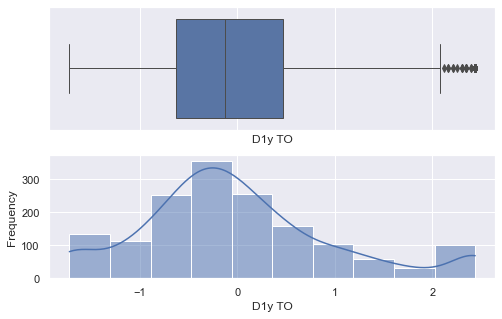

<Figure size 576x360 with 0 Axes>

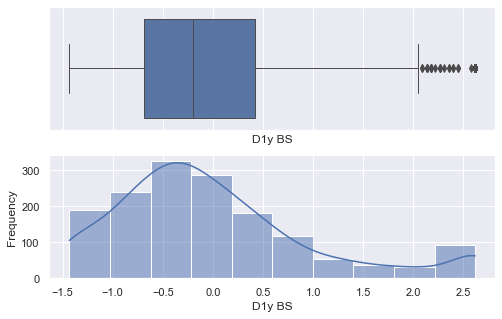

<Figure size 576x360 with 0 Axes>

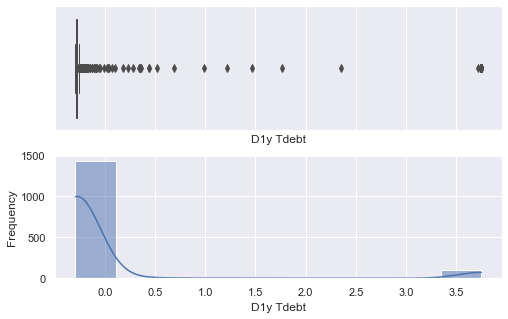

<Figure size 576x360 with 0 Axes>

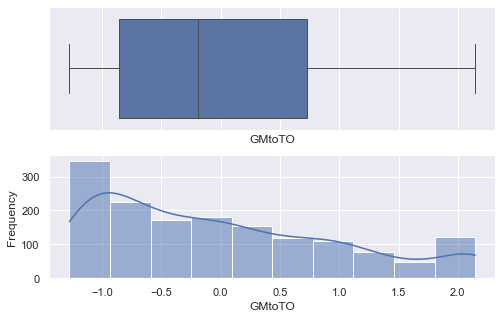

<Figure size 576x360 with 0 Axes>

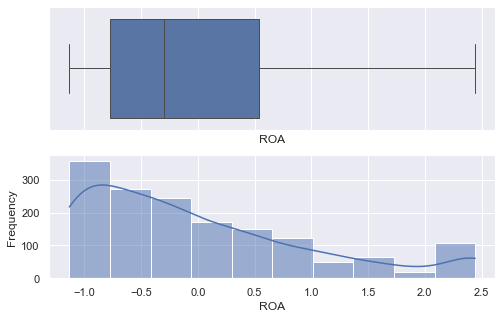

<Figure size 576x360 with 0 Axes>

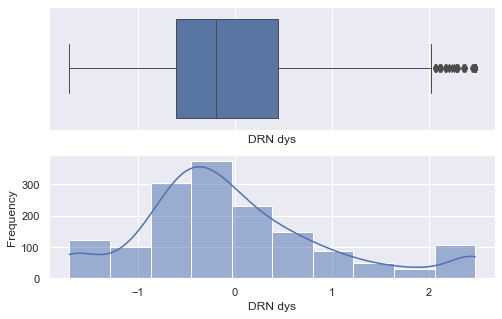

<Figure size 576x360 with 0 Axes>

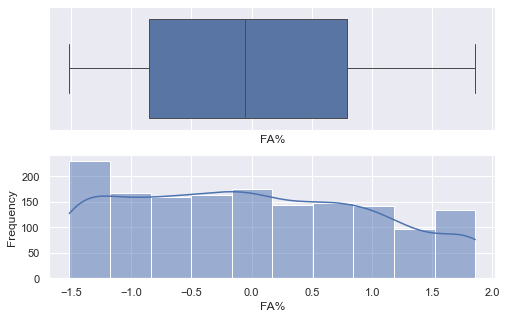

<Figure size 576x360 with 0 Axes>

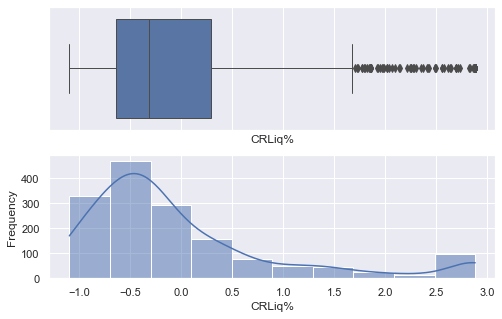

<Figure size 576x360 with 0 Axes>

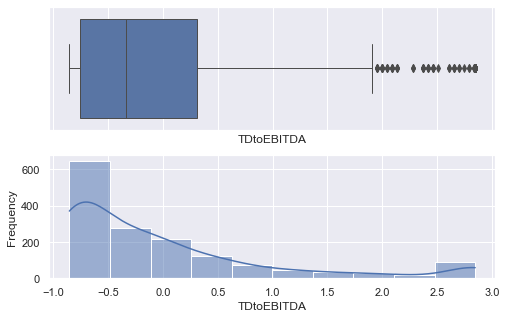

<Figure size 576x360 with 0 Axes>

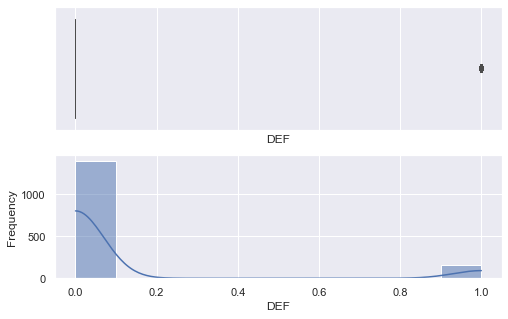

In [4]:
for i in df.columns[2:]:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(df[i], ax=ax_box , linewidth= 1.0)
    sns.histplot(df[i], ax=ax_hist , bins = 10,kde=True)

#### I.2.1.2 Correlation analysis

In [5]:
features=list(df.columns[2:])
features_X = features[:-1]
features_y = features[-1]

cor=df[features].corr()
cor

,D1y TO,D1y BS,D1y Tdebt,GMtoTO,ROA,DRN dys,FA%,CRLiq%,TDtoEBITDA,DEF
D1y TO,1.000000,0.453948,0.076130,-0.023850,0.264018,-0.135539,-0.052113,-0.018656,-0.117921,-0.066487
D1y BS,0.453948,1.000000,0.110964,-0.041253,0.252380,-0.111155,-0.100358,-0.093452,-0.037784,-0.104519
D1y Tdebt,0.076130,0.110964,1.000000,0.039691,0.102546,-0.040897,-0.085089,0.053599,-0.090331,-0.023175
GMtoTO,-0.023850,-0.041253,0.039691,1.000000,0.040376,0.029526,0.318905,0.030606,0.012333,0.077204
ROA,0.264018,0.252380,0.102546,0.040376,1.000000,-0.068884,-0.199012,0.258840,-0.515605,-0.254010
DRN dys,-0.135539,-0.111155,-0.040897,0.029526,-0.068884,1.000000,-0.107028,0.323332,0.048386,0.006082
FA%,-0.052113,-0.100358,-0.085089,0.318905,-0.199012,-0.107028,1.000000,-0.231037,0.169951,0.109518
CRLiq%,-0.018656,-0.093452,0.053599,0.030606,0.258840,0.323332,-0.231037,1.000000,-0.333573,-0.159301
TDtoEBITDA,-0.117921,-0.037784,-0.090331,0.012333,-0.515605,0.048386,0.169951,-0.333573,1.000000,0.525828
DEF,-0.066487,-0.104519,-0.023175,0.077204,-0.254010,0.006082,0.109518,-0.159301,0.525828,1.000000


In [6]:
# Show the correlations in sorted pairs
upper_corr_mat = cor.where(
    np.triu(np.ones(cor.shape), k=1).astype(np.bool))
unique_corr_pairs = upper_corr_mat.unstack().dropna()
sorted_mat = unique_corr_pairs.sort_values()
print(sorted_mat)

TDtoEBITDA  ROA          -0.515605
            CRLiq%       -0.333573
DEF         ROA          -0.254010
CRLiq%      FA%          -0.231037
FA%         ROA          -0.199012
DEF         CRLiq%       -0.159301
DRN dys     D1y TO       -0.135539
TDtoEBITDA  D1y TO       -0.117921
DRN dys     D1y BS       -0.111155
FA%         DRN dys      -0.107028
DEF         D1y BS       -0.104519
FA%         D1y BS       -0.100358
CRLiq%      D1y BS       -0.093452
TDtoEBITDA  D1y Tdebt    -0.090331
FA%         D1y Tdebt    -0.085089
DRN dys     ROA          -0.068884
DEF         D1y TO       -0.066487
FA%         D1y TO       -0.052113
GMtoTO      D1y BS       -0.041253
DRN dys     D1y Tdebt    -0.040897
TDtoEBITDA  D1y BS       -0.037784
GMtoTO      D1y TO       -0.023850
DEF         D1y Tdebt    -0.023175
CRLiq%      D1y TO       -0.018656
DEF         DRN dys       0.006082
TDtoEBITDA  GMtoTO        0.012333
DRN dys     GMtoTO        0.029526
CRLiq%      GMtoTO        0.030606
GMtoTO      D1y Tdeb

C:\Users\tiber\AppData\Local\Temp\ipykernel_14584\1809797270.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.triu(np.ones(cor.shape), k=1).astype(np.bool))


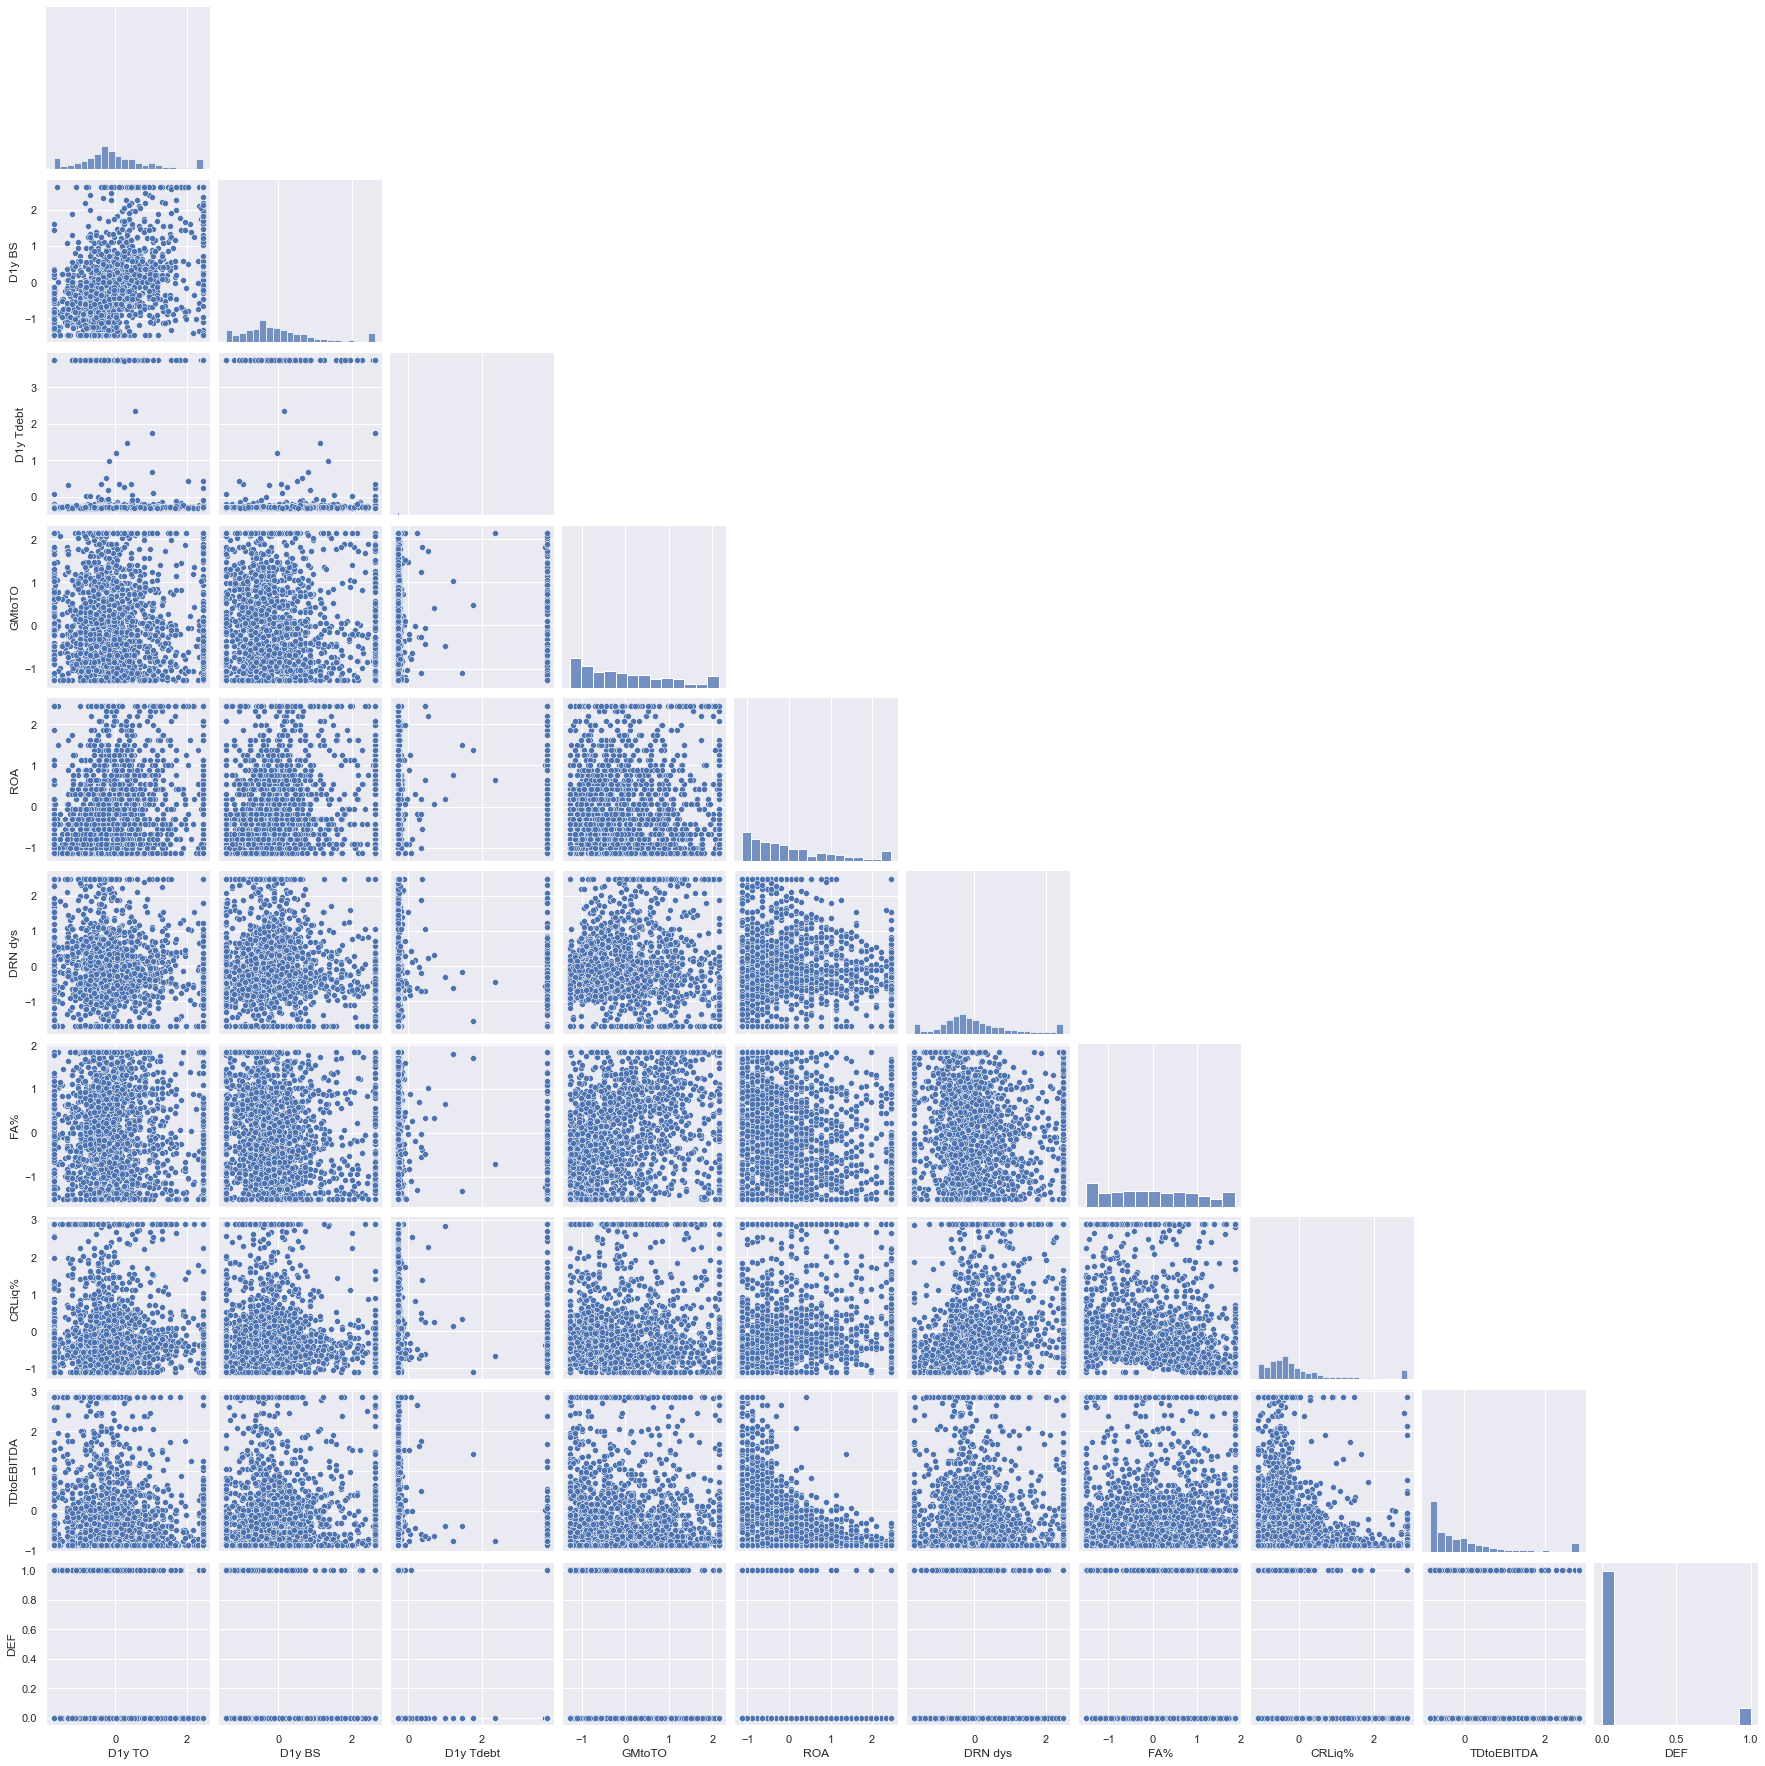

In [7]:
# Visualize correlations
sns.pairplot(df[features], corner=True)

### I.3. Data Preparation

#### I.3.1. First Data Split

Remark: Initial data are split in 3 parts: train, test and validation(a part reserved for final validation purposes)

In [8]:
def split_dataframe(df, data_split):
    """function to divide a dataframe into training, validation and test dataframes
    :param df: the full dataframe which is to be divided 
    :param data_split: a list containing the fraction of the full dataframe for each
    of training, validation and test, in that order
    :return training, validation, test: dataframes for each of the sets"""
    
    training = df.sample(frac=data_split[0])
    validation = df.drop(training.index).sample(frac=data_split[1]*len(df)/len(df.drop(training.index)))
    test = df.drop(validation.index).drop(training.index)
    
    return training, validation, test

In [9]:
train_, valid_, test_= split_dataframe(df, [0.5,0.3,0.2])
df=pd.concat([train_, valid_])
pd.set_option('max_colwidth', None)
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1245 entries, 1421 to 1523
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   cui         1245 non-null   int64  
 1   Name        1245 non-null   object 
 2   D1y TO      1245 non-null   float64
 3   D1y BS      1245 non-null   float64
 4   D1y Tdebt   1245 non-null   float64
 5   GMtoTO      1245 non-null   float64
 6   ROA         1245 non-null   float64
 7   DRN dys     1245 non-null   float64
 8   FA%         1245 non-null   float64
 9   CRLiq%      1245 non-null   float64
 10  TDtoEBITDA  1245 non-null   float64
 11  DEF         1245 non-null   int64  
dtypes: float64(9), int64(2), object(1)
memory usage: 126.4+ KB


In [10]:
test_.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 312 entries, 0 to 1555
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   cui         312 non-null    int64  
 1   Name        312 non-null    object 
 2   D1y TO      312 non-null    float64
 3   D1y BS      312 non-null    float64
 4   D1y Tdebt   312 non-null    float64
 5   GMtoTO      312 non-null    float64
 6   ROA         312 non-null    float64
 7   DRN dys     312 non-null    float64
 8   FA%         312 non-null    float64
 9   CRLiq%      312 non-null    float64
 10  TDtoEBITDA  312 non-null    float64
 11  DEF         312 non-null    int64  
dtypes: float64(9), int64(2), object(1)
memory usage: 31.7+ KB


In [11]:
# SHOW % of distress in the train and validation set
print(f'train_def :',df['DEF'].sum()/len(df))
print(f'validation_def :',test_['DEF'].sum()/len(test_))

train_def : 0.09959839357429719
validation_def : 0.11217948717948718


#### I.3.2. Oversampling

#### I.3.2.1. Construct the TRAINING set :

Remark: randomly select 50 per cent of the samples in set A and add equally many samples from set B.

In [12]:
df_A, df_B = df[df['DEF']>0], df[df['DEF']== 0]
df_Arnd = df_A.sample(frac=0.50, random_state=1)
df_Arnd.shape

(62, 12)

In [13]:
df_train = pd.concat([df_Arnd, df_B.head (len(df_Arnd))])
df_train.shape

(124, 12)

#### I.3.2.2. Construct the TEST set:

Remark: select the remaining 50 per cent of samples from set A and add enough samples from set B so as to restore the original ratio from the overall data set.

In [14]:
df_Arest, df_Brest = df_A.drop(df_A.sample(frac=0.50).index), df_B.drop(df_B.head(len(df_Arnd)).index)
print ('df_Arest.shape',df_Arest.shape)
print ('df_Brest.shape',df_Brest.shape)

df_Arest.shape (62, 12)
df_Brest.shape (1059, 12)


In [15]:
orig_ratio_sample = df['DEF'].value_counts()[1]/len(df.index)
print('orig_ratio_sample',orig_ratio_sample)
Brest_sample_lenght = int(len(df_Arest.index)/orig_ratio_sample)
print('Brest_sample_lenght',Brest_sample_lenght)

orig_ratio_sample 0.09959839357429719
Brest_sample_lenght 622


In [16]:
df_test_ovs = pd.concat([df_Arest, df_Brest.head (Brest_sample_lenght)])
print('df_test_ovs.shape',df_test_ovs.shape)

df_test_ovs.shape (684, 12)


#### I.3.3 Construct final training and validation samples

In [17]:
df.sample(frac=1)
data = df.values
X, y = data[:, 2:-1], data[:, -1]
print(X.shape, y.shape)

(1245, 9) (1245,)


In [18]:
#transform y in yy binary for usage in method_2_crossvalidation
from sklearn.utils.multiclass import type_of_target
from sklearn.preprocessing import LabelEncoder

print('type_of_target(y)',type_of_target(y))
label_encoder = LabelEncoder()
yy = label_encoder.fit_transform(y)
print('type_of_target(yy)',type_of_target(yy))

type_of_target(y) unknown
type_of_target(yy) binary


#### I.3.3.1 METHOD_1_standard sampling train_65_test_35

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, yy, train_size=0.65, test_size=.35, random_state=0,shuffle=False)
print('X_train.shape', X_train.shape)
print('y_train.shape', y_train.shape)
print('X_test.shape', X_test.shape)
print('y_test.shape', y_test.shape)

X_train.shape (809, 9)
y_train.shape (809,)
X_test.shape (436, 9)
y_test.shape (436,)


#### I.3.3.2 METHOD_2_oversampling

In [20]:
df_train = df_train[features]
print('df_train.shape', df_train.shape)
df_train.head(2)

df_train.shape (124, 10)


,D1y TO,D1y BS,D1y Tdebt,GMtoTO,ROA,DRN dys,FA%,CRLiq%,TDtoEBITDA,DEF
253,-1.719252,-1.300192,-0.280968,0.310017,-1.132620,1.569345,-1.253278,-1.098237,2.846384,1
1254,-0.485416,-0.639918,-0.291153,-0.816608,1.609605,-0.024296,0.509962,-0.868033,-0.852528,1


In [21]:
train = df_train.to_numpy()
train.shape

(124, 10)

In [22]:
df_test_ovs = df_test_ovs[features]
print('df_test_ovs.shape', df_test_ovs.shape)
df_test_ovs.head(2)

df_test_ovs.shape (684, 10)


,D1y TO,D1y BS,D1y Tdebt,GMtoTO,ROA,DRN dys,FA%,CRLiq%,TDtoEBITDA,DEF
895,-0.622509,-0.727955,-0.281553,2.104271,-0.894166,-1.705024,1.856681,-1.098237,2.846384,1
45,0.154351,-0.683937,3.748036,1.144553,-1.013393,-1.705024,-0.475114,-0.383622,-0.198680,1


In [23]:
test_ovs = df_test_ovs.to_numpy()
test_ovs.shape

(684, 10)

In [24]:
y_test_ovs = df_test_ovs['DEF'].to_numpy()

In [25]:
X_train_df = df_train[features_X]
y_train_df= df_train[features_y]
print('X_train_df.shape',X_train_df.shape)
print('y_train_df.shape',y_train_df.shape)
X_test_ovs_df = df_test_ovs[features_X]
y_test_ovs_df = df_test_ovs[features_y]
print('X_test_ovs_df.shape',X_test_ovs_df.shape)
print('y_test_ovs_df.shape',y_test_ovs_df.shape)

X_train_df.shape (124, 9)
y_train_df.shape (124,)
X_test_ovs_df.shape (684, 9)
y_test_ovs_df.shape (684,)


In [26]:
print('type_of_target(y_train_f)',type_of_target(y_train_df))
label_encoder = LabelEncoder()
yy2 = label_encoder.fit_transform(y_train_df)
print('type_of_target(yy)',type_of_target(yy2))

type_of_target(y_train_f) binary
type_of_target(yy) binary


### II. MODELING PART

In [27]:
from sklearn import svm
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from skopt import Optimizer
from skopt import BayesSearchCV 
from skopt.space import Real, Categorical, Integer

In [28]:
# Define general type of models to be used
models = {
'log_reg' : LogisticRegression,
'rf' : RandomForestClassifier,
'svc' : SVC}

In [29]:
# Define functions which lead the calculations

def search_space(model):
    
    space = {}
    if model == 'svc':
        space = {
            'C' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50],
            "kernel": Categorical(['linear','poly','rbf','sigmoid']),
            'gamma': [0.001, 0.01, 0.1, 0.5, 1],
           }
    elif model == 'log_reg':
        space = {
            'C' : Real(0.05, 30),
            #'class_weight': Categorical(['None','balanced']),
            'solver':Categorical(['liblinear','lbfgs']),
            #'penalty':Categorical(['l1','l2']),
                }
    elif model == 'rf':
        space = {'n_estimators': Integer(10,100),
            'max_depth': Integer(5,50),
            "max_features":Integer(1,8),
            "min_samples_split":Integer(2,11),
            "min_samples_leaf":Integer(1,11),
            "criterion":Categorical(['gini','entropy'])
            }
    return space

def model_train_test (model, X_train, y_train, X_test, y_test, bo=1):
    # models = 'svc','rf', 'log_reg'
    if bo == 1:
        space = search_space(model)
        clf = models[model]()
        if model == 'log_reg':
            optBayes = BayesSearchCV(clf, space, cv=3 ,n_iter=20, scoring='roc_auc', random_state=0) #scoring='accuracy'
        else:
            optBayes = BayesSearchCV(clf, space, cv=3, n_iter=20, random_state=0, n_jobs=-1) #scoring='accuracy'
        optBayes.fit(X_train, y_train)
        bclf = optBayes.best_estimator_
        bspace = optBayes.best_params_
        bscore = optBayes.best_score_
        ## test the model
        y_estimate = bclf.predict(X_test)
        cm = metrics.confusion_matrix(y_test,y_estimate)
        class_report = classification_report(y_test,y_estimate, output_dict=True)
        return bclf,bspace,bscore,cm,class_report
    else:
        if model == 'svc':
            clf = models[model](gamma='scale', class_weight='balanced')
        else:
            clf = models[model]()
        clf.fit(X_train, y_train)
        y_estimate = clf.predict(X_test)
        cm = metrics.confusion_matrix(y_test,y_estimate)
        class_report = classification_report(y_test,y_estimate, output_dict=True)
        return clf,cm,class_report
    
def model_eval (*class_report):
    dflist = []
    for i in range(len(class_report)):
        dflist.append(pd.DataFrame.from_dict(class_report[i]))   
    eval= pd.concat(dflist,keys=['1','2','3','4','5','6','7','8','9','10','11','12','13'])  
    return eval

def model_validation (model,X_validatation,y_validation):
    y_estimate_validation = model.predict(X_validatation)
    cm_validation = metrics.confusion_matrix(y_validation, y_estimate_validation)
    class_report = classification_report(y_validation, y_estimate_validation, output_dict=True)
    return cm_validation, class_report

#### II.1 NAIVE model 

In [30]:
accuracy = 1- (y_test.sum()/len(y_test))
sensitivity = 0/y_test.sum()
specificity = (len(y_test) - y_test.sum())/(len(y_test)- y_test.sum())

print(f'NaiveModel on Test_set : [Accuracy :',accuracy,' Sensitivity_recall :',sensitivity,' Specificity :', specificity, ']')

NaiveModel on Test_set : [Accuracy : 0.9151376146788991  Sensitivity_recall : 0.0  Specificity : 1.0 ]


#### II.2 RF, SVC, LogR with and without optimization, based on standard and oversampled data (see data preparation method 1 and 2)

In [31]:
# Remark:it was intentionally made by manually repeating the combinations, without defining a loop function

# RF
#### standard train-test split, without optimization
clf1,cm1,class_report1 = model_train_test('rf', X_train, y_train, X_test, y_test, bo=0)
#### standard train-test split, with optimization
bclf2,bspace2,bscore2,cm2,class_report2 = model_train_test('rf', X_train, y_train, X_test, y_test)
#### oversample, without optimization
clf3,cm3,class_report3 = model_train_test('rf', X_train_df, y_train_df, X_test_ovs_df, y_test_ovs_df,bo=0)
#### oversample, with optimization
bclf4,bspace4,bscore4,cm4,class_report4 = model_train_test('rf', X_train_df, y_train_df, X_test_ovs_df, y_test_ovs_df)

# SVC
#### standard train-test split, without optimization
clf5,cm5,class_report5 = model_train_test('svc', X_train, y_train, X_test, y_test,bo=0)
#### standard train-test split, with optimization
bclf6,bspace6,bscore6,cm6,class_report6 = model_train_test('svc', X_train, y_train, X_test, y_test)
#### oversample, without optimization
clf7,cm7,class_report7 = model_train_test('svc', X_train_df, y_train_df, X_test_ovs_df, y_test_ovs_df,bo=0)
#### oversample, with optimization
bclf8,bspace8,bscore8,cm8,class_report8  = model_train_test('svc', X_train_df, y_train_df, X_test_ovs_df, y_test_ovs_df)

# log_reg
#### standard train-test split, without optimization
clf9,cm9,class_report9 = model_train_test('log_reg', X_train, y_train, X_test, y_test,bo=0)
#### standard train-test split, with optimization
bclf10,bspace10,bscore10,cm10,class_report10 = model_train_test('log_reg', X_train, y_train, X_test, y_test)
#### oversample, without optimization
clf11,cm11,class_report11 = model_train_test('log_reg', X_train_df, y_train_df, X_test_ovs_df, y_test_ovs_df,bo=0)
#### oversample, with optimization
bclf12,bspace12,bscore12,cm12,class_report12 = model_train_test('log_reg', X_train_df, y_train_df, X_test_ovs_df, y_test_ovs_df)

# Evaluation of the models based on test data
model_eval(class_report1,class_report2,class_report3,class_report4,class_report5,class_report6,class_report7,class_report8,class_report9,class_report10,class_report11,class_report12)

C:\Users\tiber\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\tiber\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


0          1  accuracy   macro avg  weighted avg
1  precision    0.949398   0.761905  0.940367    0.855651      0.933487
   recall       0.987469   0.432432  0.940367    0.709951      0.940367
   f1-score     0.968059   0.551724  0.940367    0.759892      0.932728
   support    399.000000  37.000000  0.940367  436.000000    436.000000
2  precision    0.940758   0.857143  0.938073    0.898951      0.933662
   recall       0.994987   0.324324  0.938073    0.659656      0.938073
   f1-score     0.967113   0.470588  0.938073    0.718851      0.924977
   support    399.000000  37.000000  0.938073  436.000000    436.000000
3  precision    0.982692   0.323171  0.824561    0.652932      0.922911
   recall       0.821543   0.854839  0.824561    0.838191      0.824561
   f1-score     0.894921   0.469027  0.824561    0.681974      0.856317
   support    622.000000  62.000000  0.824561  684.000000    684.000000
4  precision    0.973025   0.290909  0.808480    0.631967      0.911196
   recall       0.811897   0.774194  0.808480    0.793045      0.808480
   f1-score     0.885188   0.422907  0.808480    0.654048      0.843286
   support    622.000000  62.000000  0.808480  684.000000    684.000000
5  precision    0.958678   0.301370  0.848624    0.630024      0.902897
   recall       0.872180   0.594595  0.848624    0.733388      0.848624
   f1-score     0.913386   0.400000  0.848624    0.656693      0.869819
   support    399.000000  37.000000  0.848624  436.000000    436.000000
6  precision    0.946731   0.652174  0.931193    0.799453      0.921734
   recall       0.979950   0.405405  0.931193    0.692678      0.931193
   f1-score     0.963054   0.500000  0.931193    0.731527      0.923758
   support    399.000000  37.000000  0.931193  436.000000    436.000000
7  precision    0.966132   0.349593  0.855263    0.657863      0.910247
   recall       0.871383   0.693548  0.855263    0.782466      0.855263
   f1-score     0.916314   0.464865  0.855263    0.690590      0.875394
   support    622.000000  62.000000  0.855263  684.000000    684.000000
8  precision    0.959596   0.422222  0.888889    0.690909      0.910887
   recall       0.916399   0.612903  0.888889    0.764651      0.888889
   f1-score     0.937500   0.500000  0.888889    0.718750      0.897844
   support    622.000000  62.000000  0.888889  684.000000    684.000000
9  precision    0.946731   0.652174  0.931193    0.799453      0.921734
   recall       0.979950   0.405405  0.931193    0.692678      0.931193
   f1-score     0.963054   0.500000  0.931193    0.731527      0.923758
   support    399.000000  37.000000  0.931193  436.000000    436.000000
10 precision    0.946731   0.652174  0.931193    0.799453      0.921734
   recall       0.979950   0.405405  0.931193    0.692678      0.931193
   f1-score     0.963054   0.500000  0.931193    0.731527      0.923758
   support    399.000000  37.000000  0.931193  436.000000    436.000000
11 precision    0.964486   0.288591  0.817251    0.626538      0.903221
   recall       0.829582   0.693548  0.817251    0.761565      0.817251
   f1-score     0.891962   0.407583  0.817251    0.649772      0.848056
   support    622.000000  62.000000  0.817251  684.000000    684.000000
12 precision    0.964684   0.294521  0.821637    0.629602      0.903938
   recall       0.834405   0.693548  0.821637    0.763977      0.821637
   f1-score     0.894828   0.413462  0.821637    0.654145      0.851195
   support    622.000000  62.000000  0.821637  684.000000    684.000000

#### II.3 Select the best models

Remark: This step was intentionally done manually, based on the evaluation of the models on the test data presented above.The best 4-5 models out of 12 were selected. The selection was carried take in consideration :

     f1_score_class_1 > 0.5 and recall_class1 > 0.5 or recall_class1 > 0.8 and f1_score_class_1 near 0.5
     
#### Test the best models on Validation Data (see Data Preparation part for Validation Data)     

In [39]:
valid_X =test_[features_X]
valid_y =test_[features_y]

# models selected to go further:
testcm3, test_m3 = model_validation(clf3,valid_X,valid_y)
testcm4, test_m4 = model_validation(bclf4,valid_X,valid_y)
testcm7,test_m7 = model_validation(clf7,valid_X,valid_y)
testcm8,test_m8 = model_validation(bclf8,valid_X,valid_y)
testcm12,test_m12 = model_validation(bclf12,valid_X,valid_y)

#evaluation of the models on Validation Data
model_eval(test_m3, test_m4 ,test_m7 ,test_m8, test_m12)

0          1  accuracy   macro avg  weighted avg
1 precision    0.978070   0.357143  0.810897    0.667607      0.908415
  recall       0.805054   0.857143  0.810897    0.831099      0.810897
  f1-score     0.883168   0.504202  0.810897    0.693685      0.840656
  support    277.000000  35.000000  0.810897  312.000000    312.000000
2 precision    0.973684   0.345238  0.804487    0.659461      0.903185
  recall       0.801444   0.828571  0.804487    0.815008      0.804487
  f1-score     0.879208   0.487395  0.804487    0.683301      0.835255
  support    277.000000  35.000000  0.804487  312.000000    312.000000
3 precision    0.967347   0.402985  0.846154    0.685166      0.904037
  recall       0.855596   0.771429  0.846154    0.813512      0.846154
  f1-score     0.908046   0.529412  0.846154    0.718729      0.865571
  support    277.000000  35.000000  0.846154  312.000000    312.000000
4 precision    0.961977   0.510204  0.891026    0.736091      0.911298
  recall       0.913357   0.714286  0.891026    0.813822      0.891026
  f1-score     0.937037   0.595238  0.891026    0.766138      0.898694
  support    277.000000  35.000000  0.891026  312.000000    312.000000
5 precision    0.966102   0.355263  0.817308    0.660682      0.897578
  recall       0.823105   0.771429  0.817308    0.797267      0.817308
  f1-score     0.888889   0.486486  0.817308    0.687688      0.843748
  support    277.000000  35.000000  0.817308  312.000000    312.000000

#### Visualisation of the best 4 models based on validation data

Text(0.5, 1.0, 'm8')

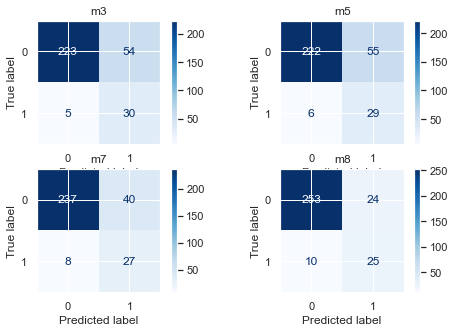

In [40]:
cm_display3 = metrics.ConfusionMatrixDisplay(confusion_matrix = testcm3)
cm_display4 = metrics.ConfusionMatrixDisplay(confusion_matrix = testcm4)
cm_display7 = metrics.ConfusionMatrixDisplay(confusion_matrix = testcm7)
cm_display8 = metrics.ConfusionMatrixDisplay(confusion_matrix = testcm8)

fig, axs = plt.subplots(2, 2)
cm_display3.plot(ax=axs[0,0],cmap='Blues')
cm_display4.plot(ax=axs[0,1],cmap='Blues')
cm_display7.plot(ax=axs[1,0],cmap='Blues')
cm_display8.plot(ax=axs[1,1],cmap='Blues')
axs[0, 0].set_title('m3')
axs[0, 1].set_title('m5')
axs[1, 0].set_title('m7')
axs[1, 1].set_title('m8')

### CONCLUSION

All four models have better results in the validation, than in the test in terms of: recall_class1 and f1_score_class1. Only 3 models, respectively m3, m7 and m8 have f1_score_class1 greater than 0.5 and recall_class1 > 0.71.
Come back to the final goal of this research, respectively the model should be able to better identify true positive cases, i.e. companies that will potentially be in distress, so that the creditor can intervene as quickly as possible to recover the borrowed amounts. But at the same time the false positive cases should not be high due to the creditor restriction related to the budget expenses assigned to their verification. Considering the validation results, a relatively good trade off between the two objectives can be assured by the m8 model (recall 0.71, f1_score 0.59)

### Additional developments to suport the management of monitoring and early intervation process
#### Probability calculation

Remark: Calculating the probability of a company entering in distress should be used as an anchor in the intervention decision. For example, determining a probability of NOGO (keep existing process) or GO (initiate a new process for amount recoveries)

In [ ]:
y_pred_prob = bclf10.predict_proba(X_test)[:]
# store the probabilities in dataframe
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of NoGO (0)', 'Prob of GO (1)'])
y_pred_prob_df